# COVID-19 Quick Analysis
### Unpacking how SA compared to the rest of the world given Communicable Diseases Data

In [368]:
#importing the necessary packages and cleaning up house
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 1500)

In [370]:
# The code was removed by Watson Studio for sharing.

,Series Code,Country Name,Country Code,2016 [YR2016]
Series Name,,,,
"Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)",SH.DTH.COMM.ZS,Afghanistan,AFG,36.4
"Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)",SH.DTH.COMM.ZS,Albania,ALB,2.9
"Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)",SH.DTH.COMM.ZS,Algeria,DZA,14.8
"Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)",SH.DTH.COMM.ZS,American Samoa,ASM,..
"Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)",SH.DTH.COMM.ZS,Andorra,AND,..


In [371]:
#Removing unnecessary fields
df = df_data_0.drop(['Series Code', 'Country Code'], axis = 1)
df.columns = ['Country', '2016']

df.head()

,Country,2016
Series Name,,
"Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)",Afghanistan,36.4
"Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)",Albania,2.9
"Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)",Algeria,14.8
"Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)",American Samoa,..
"Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)",Andorra,..


# Communicable Diseases
## Bar Graphs

In [372]:
#selecting the right data
df_com = df.loc[['Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)'],:]
#renaming columns and reindexing
df_com.columns = ['Country','Communicable Disease']
df_com = df_com.reset_index(drop = True)

In [373]:
#checking and changing data types and dealing with null values
df_com.dtypes
df_com['Communicable Disease'][3]
df_com['Communicable Disease'] = pd.to_numeric(df_com['Communicable Disease'], errors='coerce') 
df_com['Communicable Disease'].replace({'..',np.nan }, inplace = True)
df_com.head()

,Country,Communicable Disease
0,Afghanistan,36.4
1,Albania,2.9
2,Algeria,14.8
3,American Samoa,NaN
4,Andorra,NaN


In [374]:
#rounding for speed and getting the data into a percentage
df_com['Communicable Disease'] = df_com['Communicable Disease'].round(2)
df_com['Communicable Disease'] = df_com['Communicable Disease']/100
df_com

,Country,Communicable Disease
0,Afghanistan,0.3640
1,Albania,0.0290
2,Algeria,0.1480
3,American Samoa,NaN
4,Andorra,NaN
5,Angola,0.6340
6,Antigua and Barbuda,0.1190
7,Arab World,0.1997
8,Argentina,0.1590
9,Armenia,0.0280


In [375]:
#Creating a subset of the data in case we want to look at an "Africa Only" view.
africa_list = ['Algeria',
'Angola',
'Benin',
'Botswana',
'Burkina Faso',
'Burundi',
'Cabo Verde',
'Cameroon',
'Central African Republic',
'Chad',
'Comoros',
'Congo, Dem. Rep.',
'Congo, Rep.',
'Cote d\'Ivoire',
'Djibouti',
'Egypt, Arab Rep.',
'Equatorial Guinea',
'Eritrea',
'Eswatini',
'Ethiopia',
'Gabon',
'Gambia, The',
'Ghana',
'Guinea',
'Guinea-Bissau',
'Kenya',
'Lesotho',
'Liberia',
'Libya',
'Madagascar',
'Malawi',
'Mali',
'Mauritania',
'Mauritius',
'Morocco',
'Mozambique',
'Namibia',
'Niger',
'Nigeria',
'Rwanda',
'Sao Tome and Principe',
'Senegal',
'Seychelles',
'Sierra Leone',
'Somalia',
'South Africa',
'South Sudan',
'Sudan',
'Tanzania',
'Togo',
'Tunisia',
'Uganda',
'Zambia',
'Zimbabwe']

In [376]:
#Turning that into a dataframe to prepare for merging
len(africa_list)
region_list = list(['africa'] *54)
mapping = zip(africa_list, region_list)
mapping = list(set(mapping))
africa = pd.DataFrame(mapping)
africa.columns = ['country', 'region']

In [411]:
#Merging the World Bank Dataset to the African Country List to create the correct subset
df_af_com = df_com.merge(africa, left_on='Country', right_on='country')
df_af_com.head()

,Country,Communicable Disease,country,region
0,Algeria,0.148,Algeria,africa
1,Angola,0.634,Angola,africa
2,Benin,0.541,Benin,africa
3,Botswana,0.460,Botswana,africa
4,Burkina Faso,0.563,Burkina Faso,africa


In [378]:
#Dropping the repetitive columns
df_af_com = df_af_com.drop(['country', 'region'], axis = 1)
df_af_com.head()

,Country,Communicable Disease
0,Algeria,0.148
1,Angola,0.634
2,Benin,0.541
3,Botswana,0.460
4,Burkina Faso,0.563


In [379]:
#Takinga look at the African Average
df_af_com.describe()[1:2]

,Communicable Disease
mean,0.477963


In [380]:
#creating a subset for countries that border South Africa
df_sa = df_af_com.iloc[[3,18,26,35,36,45,53], :]
df_sa = df_sa.sort_values(['Communicable Disease']).reset_index(drop = True)
df_sa.head()

,Country,Communicable Disease
0,South Africa,0.396
1,Botswana,0.460
2,Namibia,0.493
3,Eswatini,0.537
4,Zimbabwe,0.546


Text(0.5, 0.9, 'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total): \n South Africa and Neighbors')

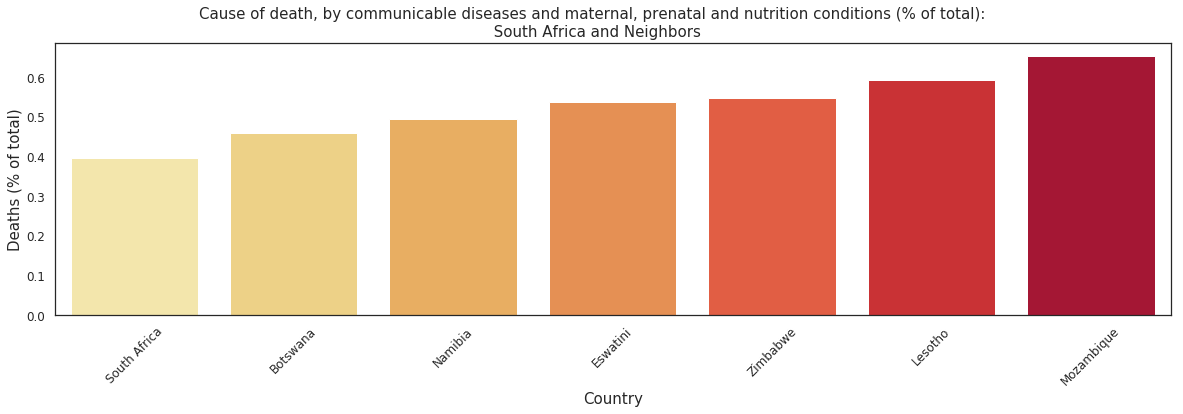

In [409]:
#Setting the figure font size
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title;

#Creating a bar graph using Seaborn and Matplotlib
country = df_sa['Country']
com = df_sa['Communicable Disease']

sns.set_style("white")

sns.barplot(x = country, y= com,  palette = 'YlOrRd')
plt.xticks(rotation = 45);
plt.ylabel('Deaths (% of total)');
plt.figtext(.5,.9,'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total): \n South Africa and Neighbors', fontsize=15, ha='center')



#### We can see that we are the best of the bunch with a considerably lower death rate than others. 

In [383]:
#Now going back to the global data to pick out some countries to compare to so that we get context
df_com
#Picking USA, Italy, Germany, China, UK, Spain and France
df_worst = df_com.iloc[[44,212,111,86,81,216,245,246], :]
#Sorting from lowest to highest
df_worst = df_worst.sort_values(['Communicable Disease'])
df_worst.head()

,Country,Communicable Disease
0,Afghanistan,0.3640
1,Albania,0.0290
2,Algeria,0.1480
3,American Samoa,NaN
4,Andorra,NaN
5,Angola,0.6340
6,Antigua and Barbuda,0.1190
7,Arab World,0.1997
8,Argentina,0.1590
9,Armenia,0.0280


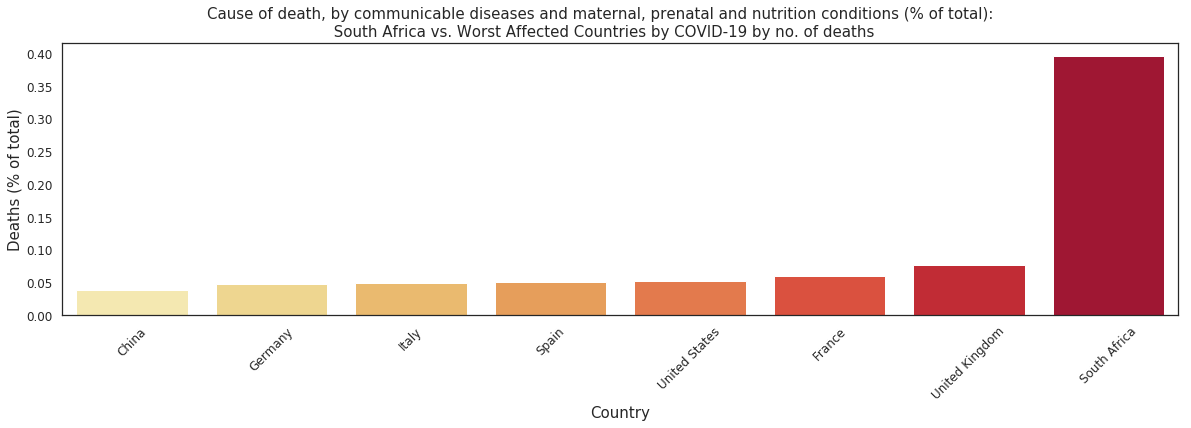

In [412]:
#Setting the figure font size
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title;

country = df_worst['Country']
com = df_worst['Communicable Disease']

sns.set_style("white")

sns.barplot(x = country, y= com,  palette = 'YlOrRd')
plt.xticks(rotation = 45);
plt.figtext(.5,.9,'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total): \n South Africa vs. Worst Affected Countries by COVID-19 by no. of deaths', fontsize=15, ha='center')
plt.ylabel('Deaths (% of total)');

# Communicable Diseases
## Folium Geographical Maps

In [386]:
#installing Folium and setting the map
!conda install -c conda-forge folium=0.5.0 --yes 
import folium
# define the world map

f = folium.Figure(width=500, height=600)
world_map = folium.Map(location = [ 5, 16,], zoom_start = 3.3, tiles = 'openstreetmap').add_to(f)

# display world map
world_map


Solving environment: \ ^C
failed

CondaError: KeyboardInterrupt



In [387]:
# download countries geojson file
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [388]:
world_geo = r'world_countries.json' # geojson file

In [389]:
#Comparing South Africa to the rest of the Continent. Zoom = Africa only
import os
import webbrowser

world_map.choropleth(
    geo_data=world_geo,
    data=df_af_com,
    columns=['Country', 'Communicable Disease'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.1, 
    line_opacity=0.1,
    legend_name='Mortality Rate: Communicable Diseases in Africa'
)
filepath = r'C:\Users\ABAL650\Documents\IBM_Data_Science\Projects\Data_Viz\filename.html'
world_map.save(filepath)
# display map
webbrowser.open('file://' + filepath)
world_map

In [390]:
#Creating a broader world map so we can compare all countries that we have data for
# define the world map

f = folium.Figure(width=600, height=350)
world_map = folium.Map(location = [ 5, 16,], zoom_start = 1.4, tiles = 'openstreetmap').add_to(f)

# display world map
world_map


In [413]:
#Adding our data as a chloropleth map
import os
import webbrowser

world_map.choropleth(
    geo_data=world_geo,
    data=df_com,
    columns=['Country', 'Communicable Disease'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', line_opacity=0.1,
    legend_name='Cause of death, by communicable diseases and others (% of total)'
)
filepath = r'C:\Users\ABAL650\Documents\IBM_Data_Science\Projects\Data_Viz\filename.html'
world_map.save(filepath)
# display map
webbrowser.open('file://' + filepath)
world_map

# Map: Physicians per 1000

In [392]:
#Cleaning up the initial dataset and checking how many countries we ave data for
df_d = df.reset_index()
df_d['Series Name'].value_counts()

Community health workers (per 1,000 people)                                                              259
Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)    259
Current health expenditure (% of GDP)                                                                    259
Hospital beds (per 1,000 people)                                                                         259
Physicians (per 1,000 people)                                                                            259
Current health expenditure per capita (current US$)                                                      259
Last Updated: 12/20/2019                                                                                   1
Data from database: Health Nutrition and Population Statistics                                             1
Name: Series Name, dtype: int64

In [393]:
#Adjusting data types and dropping null values
df_d['2016'] = pd.to_numeric(df_d['2016'], errors='coerce') 
df_d = df_d.dropna(subset =['2016'])
df_d['Series Name'].value_counts()

Current health expenditure (% of GDP)                                                                    227
Current health expenditure per capita (current US$)                                                      226
Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)    224
Physicians (per 1,000 people)                                                                             92
Community health workers (per 1,000 people)                                                                6
Name: Series Name, dtype: int64

In [394]:
#Creating a subset of the data as a simplified dataframe
df_doc = df_d[df_d['Series Name'] == 'Physicians (per 1,000 people)']
df_doc = df_doc.drop(['Series Name'], axis = 1)
df_doc.columns = ['Country', 'Physicians (per 1,000 people)']
df_doc['Physicians (per 1,000 people)'] = df_doc['Physicians (per 1,000 people)'].round(2)
df_doc

,Country,"Physicians (per 1,000 people)"
1295,Afghanistan,0.28
1296,Albania,1.20
1297,Algeria,1.83
1306,Australia,3.59
1307,Austria,5.14
1311,Bangladesh,0.48
1314,Belgium,3.32
1316,Benin,0.16
1318,Bhutan,0.37
1319,Bolivia,1.61


In [396]:
#Preparing the data for merging with the Africa list to get a continental sub list
len(africa_list)
region_list = list(['africa'] *54)
mapping = zip(africa_list, region_list)
mapping = list(set(mapping))
m = pd.DataFrame(mapping)
m.columns = ['country', 'region']

In [397]:
#merging
df_doc = df_doc.merge(m, left_on='Country', right_on='country')

In [398]:
#Removing additional fields
df_doc = df_doc.drop(['country', 'region'], axis = 1)
df_doc

,Country,"Physicians (per 1,000 people)"
0,Algeria,1.83
1,Benin,0.16
2,Botswana,0.37
3,Burkina Faso,0.06
4,Burundi,0.05
5,Chad,0.05
6,"Egypt, Arab Rep.",0.81
7,Eswatini,0.08
8,Gabon,0.36
9,Ghana,0.13


In [399]:
df_sa_d = df_doc.iloc[[2,16,18,7], :]
df_sa_d = df_sa_d.sort_values(['Physicians (per 1,000 people)'])
df_sa_d

,Country,"Physicians (per 1,000 people)"
7,Eswatini,0.08
18,Zambia,0.09
2,Botswana,0.37
16,South Africa,0.80


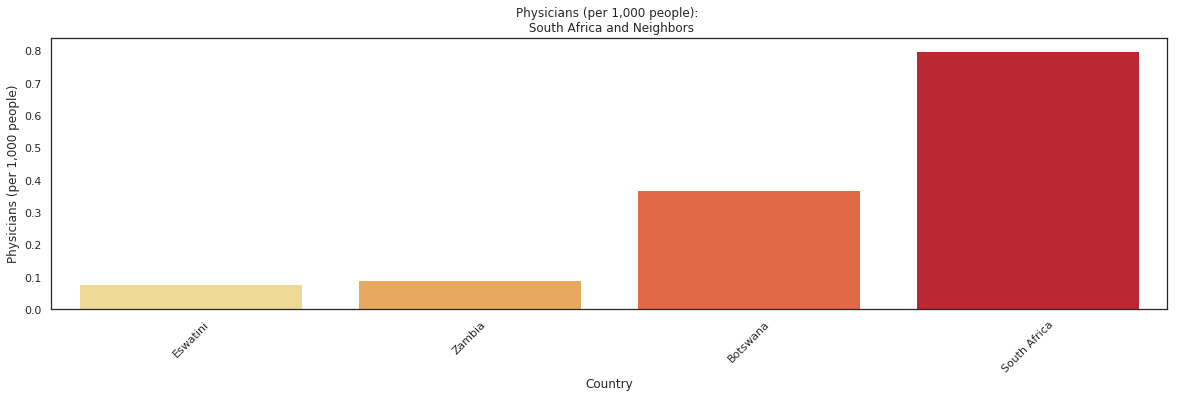

In [400]:
#Doing a quick barplot to see how we compare
import seaborn as sns
country = df_sa_d['Country']
com = df_sa_d['Physicians (per 1,000 people)']

sns.set(rc={'figure.figsize':(20,5)})
sns.set_style("white")


sns.barplot(x = country, y= com,  palette = 'YlOrRd')
plt.xticks(rotation = 45);
plt.title('Physicians (per 1,000 people): \n South Africa and Neighbors');

In [401]:
#creating a merged dataset of communicable diseases data and the physicians data so we can do a correlation analysis.
df_merged = df_af_com.merge(df_doc, left_on = 'Country', right_on = "Country")
df_merged.reset_index(drop = True, inplace = True)
df_merged

,Country,Communicable Disease,"Physicians (per 1,000 people)"
0,Algeria,0.148,1.83
1,Benin,0.541,0.16
2,Botswana,0.460,0.37
3,Burkina Faso,0.563,0.06
4,Burundi,0.558,0.05
5,Chad,0.634,0.05
6,"Egypt, Arab Rep.",0.102,0.81
7,Eswatini,0.537,0.08
8,Gabon,0.499,0.36
9,Ghana,0.475,0.13


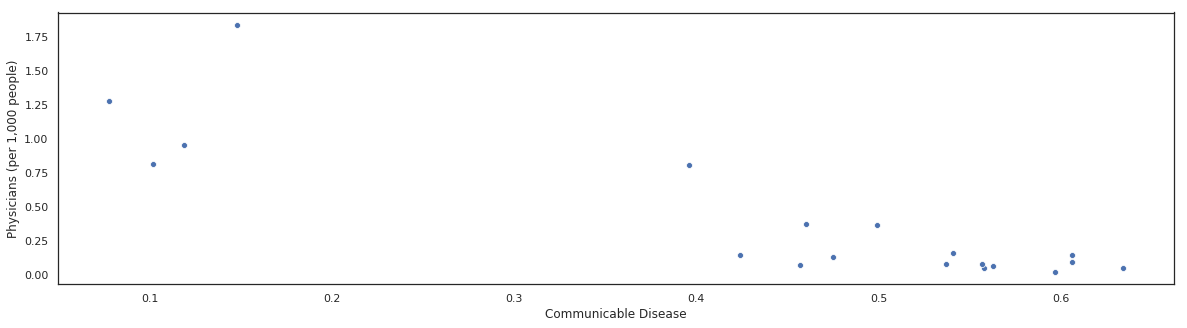

In [402]:
#simple scatter plot
sns.scatterplot(x = df_merged['Communicable Disease'], y = df_merged['Physicians (per 1,000 people)'])

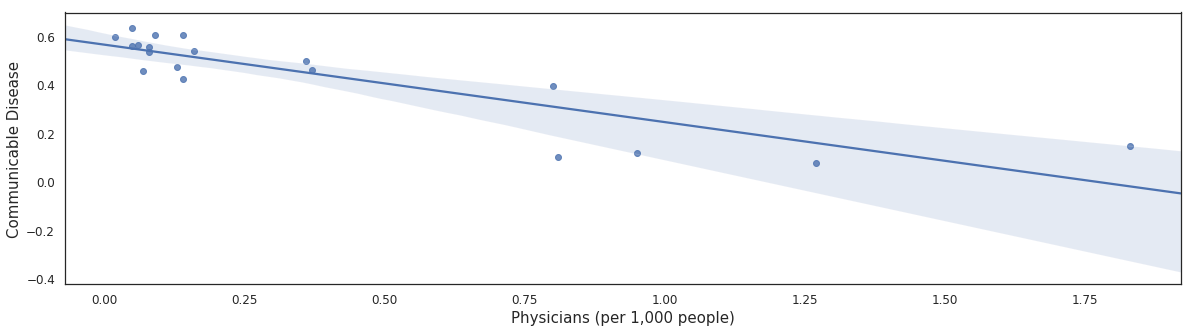

In [414]:
#doinga regression plot of the two variables
ax = sns.regplot(x="Physicians (per 1,000 people)", y="Communicable Disease", data=df_merged)

In [415]:
df_merged['Communicable Disease'].corr(df_merged['Physicians (per 1,000 people)'])

-0.8726546317073399

#### We see a high correlation of 0.87

In [416]:
world_geo = r'world_countries.json' # geojson file

In [417]:
world_map.choropleth(
    geo_data=world_geo,
    data=df_merged,
    columns=['Country', 'Physicians (per 1,000 people)'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.5, 
    line_opacity=0.2,
    legend_name='Physicians (per 1,000 people)'
)

# display map
world_map